Until [afni/afni#156 (🐍 lib_afni1D — Python 2→3)](https://github.com/afni/afni/pull/156) is resolved,

```bash
pip install "git+https://github.com/shnizzedy/afni.git@lib_afni1D/2→3#egg=afni-python&subdirectory=src/python_scripts"
```

to pip-install a Python 3 compatible `afni_python`.

In [1]:
%load_ext autoreload
%autoreload 2

# 🧙 magics

In [2]:
# imports
import git
import glob
import numpy as np
import os
import pandas as pd
import yaml

from string import ascii_lowercase

from compare import Correlation_Matrix
from defaults import motion_list, regressor_list
from subjects import fmriprep_sub, generate_subject_list_for_range

In [3]:
# args
outputs_root = os.path.expanduser("/data3/cnl/fmriprep/AllNewRun")
benchmark = {
    "software": "fmriprep",
    "run": 1
}
this_run_path = "on_nuisance_1"

In [4]:
# Load config
with open('../configs/benchmarks.yml', 'r') as config_file:
    benchmarks = yaml.safe_load(config_file)

with open('../configs/cpac.yml', 'r') as config_file:
    config_settings = yaml.safe_load(config_file)
    
cpac_dir = os.path.abspath(os.path.join(os.getcwd(), *[os.pardir for i in range(3)]))    
n_cpus = 10
pipeline_config_path = os.path.join(cpac_dir, 'dev/docker_data/')
pipeline_file = 'default_pipeline.yml'
pipeline_name = pipeline_file.split('.yml')[0]
tag = git.Repo(search_parent_directories=True).head.object.hexsha[:7]
outputs_dir = os.path.join(config_settings['this_run_outputs'], tag)
benchmark_path = benchmarks[benchmark['software']][benchmark['run']]
if 'this_run' not in vars():
    this_run = {
        "software": "C-PAC",
        "version": tag,
        "config": pipeline_name
    }
sub_list = generate_subject_list_for_range(
    (
        config_settings['subjects']['start'],
        config_settings['subjects']['stop']
    ),
    (1, 1)
)
var_list = regressor_list + motion_list

In [5]:
corrs = Correlation_Matrix(sub_list, var_list, [
    {"software": "C-PAC", "run_path": os.path.join(outputs_root, this_run_path)},
    {"software": "fmriprep", "run_path": os.path.join(outputs_root, benchmark_path)}
])

Running subject: 0 0 correlation score: 0.9321693576600344
Running subject: 0 1 correlation score: 0.9857740702741887
Running subject: 0 2 correlation score: 0.9873561862898702
Running subject: 0 3 correlation score: -0.6273528499002714
Running subject: 0 4 correlation score: -0.5500960145642857
Running subject: 0 5 correlation score: 0.4981371905970558
Running subject: 0 6 correlation score: 0.4124911414444269
Running subject: 0 7 correlation score: 0.3439110554539619
Running subject: 0 8 correlation score: -0.48325360324563066
Running subject: 0 9 correlation score: 0.8847096196288757
Running subject: 1 0 correlation score: 0.9968678028837642
Running subject: 1 1 correlation score: 0.9833967114718956
Running subject: 1 2 correlation score: 0.9914196693986737
Running subject: 1 3 correlation score: 0.5871838812198334
Running subject: 1 4 correlation score: 0.9467169746634363
Running subject: 1 5 correlation score: -0.8030418080617059
Running subject: 1 6 correlation score: 0.824962926

Running subject: 14 0 correlation score: 0.995786947374861
Running subject: 14 1 correlation score: 0.9917154689987586
Running subject: 14 2 correlation score: 0.99828073695814
Running subject: 14 3 correlation score: -0.8183040021976115
Running subject: 14 4 correlation score: 0.2743618058141691
Running subject: 14 5 correlation score: 0.2824212457116558
Running subject: 14 6 correlation score: -0.11531268896095802
Running subject: 14 7 correlation score: 0.43336083935425196
Running subject: 14 8 correlation score: 0.48328592728781294
Running subject: 14 9 correlation score: 0.8739945005827033
Running subject: 15 0 correlation score: 0.9851937612367088
Running subject: 15 1 correlation score: 0.9974211401354705
Running subject: 15 2 correlation score: 0.9341130209579303
Running subject: 15 3 correlation score: 0.9042747512476109
Running subject: 15 4 correlation score: 0.9827878130025618
Running subject: 15 5 correlation score: 0.8944352924545413
Running subject: 15 6 correlation scor

In [6]:
pd.options.display.max_rows = 999
pd.options.display.max_colwidth = 1000
pd.DataFrame(
    [corrs.data[sub][feat].paths for sub in corrs.data for feat in corrs.data[sub]],
    columns=["C-PAC", "fmriprep"],
    index=[f"{sub} {feat}" for sub in corrs.subjects for feat in corrs.features]
)

,C-PAC,fmriprep
sub-0025427_ses-1 GS,/data3/cnl/fmriprep/AllNewRun/on_nuisance_1/working/resting_preproc_sub-0025427a_ses-1/nuisance_0_0/_scan_rest_run-1/_selector_WM-2mm-M_CSF-2mm-M_tC-5PCT-PC5_aC-CSF+WM-2mm-PC5_G-M_M-SDB_P-2_BP-B0.01-T0.1/build_nuisance_regressors/nuisance_regressors.1D,/data3/cnl/fmriprep/AllNewRun/fmriprep_1/output/fmriprep/sub-0025427a/func/sub-0025427a_task-rest_run-1_desc-confounds_regressors.tsv
sub-0025427_ses-1 CSF,/data3/cnl/fmriprep/AllNewRun/on_nuisance_1/working/resting_preproc_sub-0025427a_ses-1/nuisance_0_0/_scan_rest_run-1/_selector_WM-2mm-M_CSF-2mm-M_tC-5PCT-PC5_aC-CSF+WM-2mm-PC5_G-M_M-SDB_P-2_BP-B0.01-T0.1/build_nuisance_regressors/nuisance_regressors.1D,/data3/cnl/fmriprep/AllNewRun/fmriprep_1/output/fmriprep/sub-0025427a/func/sub-0025427a_task-rest_run-1_desc-confounds_regressors.tsv
sub-0025427_ses-1 WM,/data3/cnl/fmriprep/AllNewRun/on_nuisance_1/working/resting_preproc_sub-0025427a_ses-1/nuisance_0_0/_scan_rest_run-1/_selector_WM-2mm-M_CSF-2mm-M_tC-5PCT-PC5_aC-CSF+WM-2mm-PC5_G-M_M-SDB_P-2_BP-B0.01-T0.1/build_nuisance_regressors/nuisance_regressors.1D,/data3/cnl/fmriprep/AllNewRun/fmriprep_1/output/fmriprep/sub-0025427a/func/sub-0025427a_task-rest_run-1_desc-confounds_regressors.tsv
sub-0025427_ses-1 tCompCor0,/data3/cnl/fmriprep/AllNewRun/on_nuisance_1/working/resting_preproc_sub-0025427a_ses-1/nuisance_0_0/_scan_rest_run-1/_selector_WM-2mm-M_CSF-2mm-M_tC-5PCT-PC5_aC-CSF+WM-2mm-PC5_G-M_M-SDB_P-2_BP-B0.01-T0.1/build_nuisance_regressors/nuisance_regressors.1D,/data3/cnl/fmriprep/AllNewRun/fmriprep_1/output/fmriprep/sub-0025427a/func/sub-0025427a_task-rest_run-1_desc-confounds_regressors.tsv
sub-0025427_ses-1 aCompCor0,/data3/cnl/fmriprep/AllNewRun/on_nuisance_1/working/resting_preproc_sub-0025427a_ses-1/nuisance_0_0/_scan_rest_run-1/_selector_WM-2mm-M_CSF-2mm-M_tC-5PCT-PC5_aC-CSF+WM-2mm-PC5_G-M_M-SDB_P-2_BP-B0.01-T0.1/build_nuisance_regressors/nuisance_regressors.1D,/data3/cnl/fmriprep/AllNewRun/fmriprep_1/output/fmriprep/sub-0025427a/func/sub-0025427a_task-rest_run-1_desc-confounds_regressors.tsv
sub-0025427_ses-1 aCompCor1,/data3/cnl/fmriprep/AllNewRun/on_nuisance_1/working/resting_preproc_sub-0025427a_ses-1/nuisance_0_0/_scan_rest_run-1/_selector_WM-2mm-M_CSF-2mm-M_tC-5PCT-PC5_aC-CSF+WM-2mm-PC5_G-M_M-SDB_P-2_BP-B0.01-T0.1/build_nuisance_regressors/nuisance_regressors.1D,/data3/cnl/fmriprep/AllNewRun/fmriprep_1/output/fmriprep/sub-0025427a/func/sub-0025427a_task-rest_run-1_desc-confounds_regressors.tsv
sub-0025427_ses-1 aCompCor2,/data3/cnl/fmriprep/AllNewRun/on_nuisance_1/working/resting_preproc_sub-0025427a_ses-1/nuisance_0_0/_scan_rest_run-1/_selector_WM-2mm-M_CSF-2mm-M_tC-5PCT-PC5_aC-CSF+WM-2mm-PC5_G-M_M-SDB_P-2_BP-B0.01-T0.1/build_nuisance_regressors/nuisance_regressors.1D,/data3/cnl/fmriprep/AllNewRun/fmriprep_1/output/fmriprep/sub-0025427a/func/sub-0025427a_task-rest_run-1_desc-confounds_regressors.tsv
sub-0025427_ses-1 aCompCor3,/data3/cnl/fmriprep/AllNewRun/on_nuisance_1/working/resting_preproc_sub-0025427a_ses-1/nuisance_0_0/_scan_rest_run-1/_selector_WM-2mm-M_CSF-2mm-M_tC-5PCT-PC5_aC-CSF+WM-2mm-PC5_G-M_M-SDB_P-2_BP-B0.01-T0.1/build_nuisance_regressors/nuisance_regressors.1D,/data3/cnl/fmriprep/AllNewRun/fmriprep_1/output/fmriprep/sub-0025427a/func/sub-0025427a_task-rest_run-1_desc-confounds_regressors.tsv
sub-0025427_ses-1 aCompCor4,/data3/cnl/fmriprep/AllNewRun/on_nuisance_1/working/resting_preproc_sub-0025427a_ses-1/nuisance_0_0/_scan_rest_run-1/_selector_WM-2mm-M_CSF-2mm-M_tC-5PCT-PC5_aC-CSF+WM-2mm-PC5_G-M_M-SDB_P-2_BP-B0.01-T0.1/build_nuisance_regressors/nuisance_regressors.1D,/data3/cnl/fmriprep/AllNewRun/fmriprep_1/output/fmriprep/sub-0025427a/func/sub-0025427a_task-rest_run-1_desc-confounds_regressors.tsv
sub-0025427_ses-1 FD,/data3/cnl/fmriprep/AllNewRun/on_nuisance_1/output/pipeline_cpac_default_nuisance/sub-0025427a_ses-1/frame_wise_displacement_power/_scan_rest_run-1/FD.1D,/data3/cnl/fmriprep/AllNewRun/fmriprep_1/working/fmriprep_wf/single_subject_0025427a_wf/func_p

---

In [7]:
# Save matrix
import scipy.io as sio

save_path = "/home/jon/CNL/corrs.mat"
sio.savemat(save_path, {'corrs':corrs.corrs})

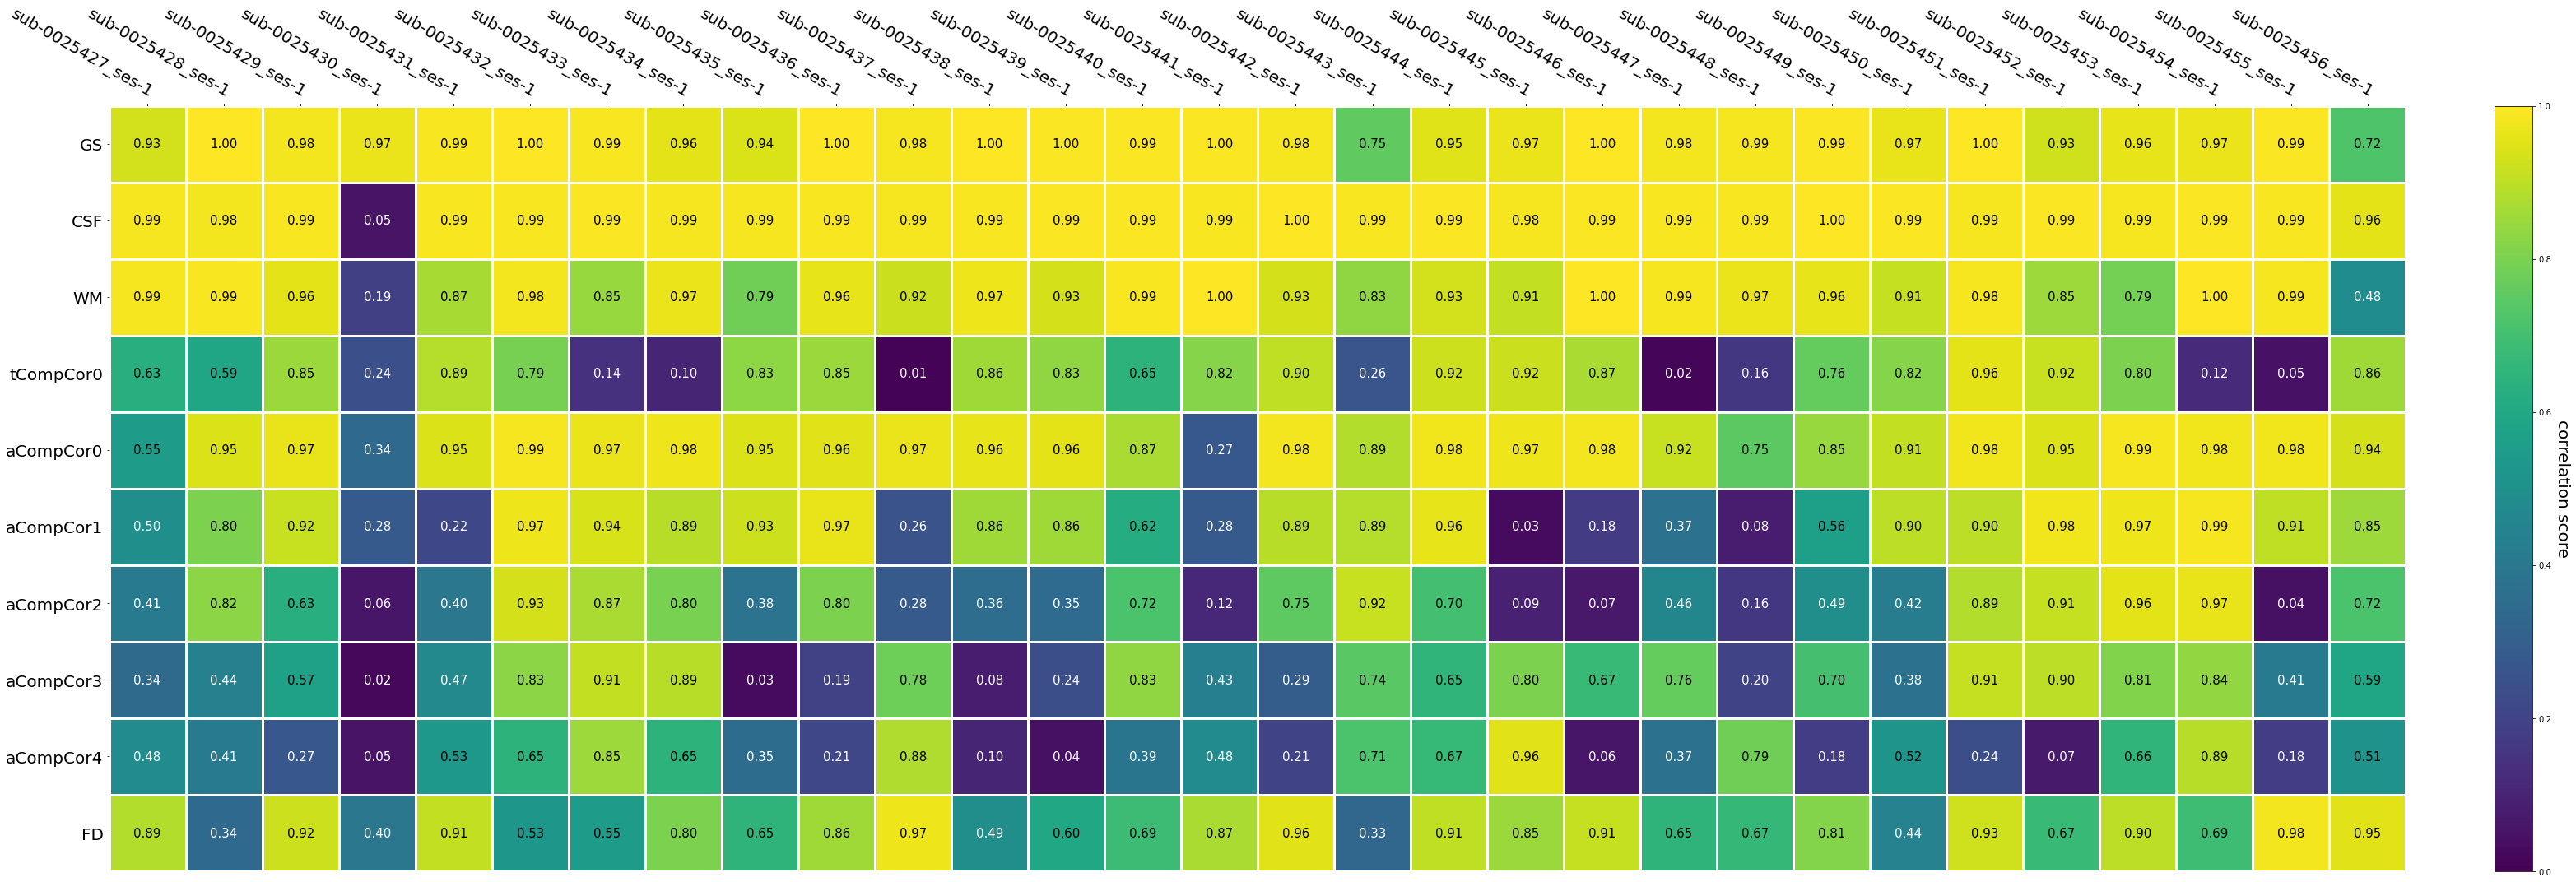

In [8]:
from defaults import motion_list, regressor_list
from heatmaps import generate_heatmap, reshape_corrs
from subjects import generate_subject_list_for_range

generate_heatmap(
    reshape_corrs(save_path),
    regressor_list + motion_list,
    generate_subject_list_for_range(
        (25427, 25456), (1, 2)
    ),
    save_path=False
)